In [1]:
import pandas as pd
from tqdm import tqdm
import os

In [2]:
data_train = pd.read_csv("./datasets/train.csv")
data_test = pd.read_csv("./datasets/test.csv")
data_val = pd.read_csv("./datasets/val.csv")
X_train, Y_train = data_train.drop('teamVictory',axis=1),data_train[['teamVictory']]
X_validate, Y_Validate = data_val.drop('teamVictory',axis=1),data_val[['teamVictory']]
X_test, Y_test = data_test.drop('teamVictory',axis=1),data_test[['teamVictory']]


In [4]:
df = X_train.loc[(X_train['Player_1_position']=='TOP') 
& (X_train['Player_2_position']=='JUNGLE')
&(X_train['Player_3_position']=='MIDDLE') 
& (X_train['Player_4_position']=='BOTTOM')
&(X_train['Player_5_position']=='UTILITY') 
& (X_train['Player_6_position']=='TOP') 
& (X_train['Player_7_position']=='JUNGLE')
&(X_train['Player_8_position']=='MIDDLE') 
& (X_train['Player_9_position']=='BOTTOM')
&(X_train['Player_10_position']=='UTILITY')]

In [37]:
def ChampCounterRelations(df):
    top_counter = df[['Player_1_pick','Player_1_gold','Player_6_pick','Player_6_gold']].groupby(['Player_1_pick','Player_6_pick']).mean().reset_index()
    top_counter['counter_Score'] = top_counter.apply(lambda x: x['Player_1_gold']-x['Player_6_gold'], axis=1)
    jug_counter = df[['Player_2_pick','Player_2_gold','Player_7_pick','Player_7_gold']].groupby(['Player_2_pick','Player_7_pick']).mean().reset_index()
    jug_counter['counter_Score'] = jug_counter.apply(lambda x: x['Player_2_gold']-x['Player_7_gold'], axis=1)
    mid_counter = df[['Player_3_pick','Player_3_gold','Player_8_pick','Player_8_gold']].groupby(['Player_3_pick','Player_8_pick']).mean().reset_index()
    mid_counter['counter_Score'] = mid_counter.apply(lambda x: x['Player_3_gold']-x['Player_8_gold'], axis=1)
    bot_counter = df[['Player_4_pick','Player_4_gold','Player_9_pick','Player_9_gold']].groupby(['Player_4_pick','Player_9_pick']).mean().reset_index()
    bot_counter['counter_Score'] = bot_counter.apply(lambda x: x['Player_4_gold']-x['Player_9_gold'], axis=1)
    sup_counter = df[['Player_5_pick','Player_5_gold','Player_10_pick','Player_10_gold']].groupby(['Player_5_pick','Player_10_pick']).mean().reset_index()
    sup_counter['counter_Score'] = sup_counter.apply(lambda x: x['Player_5_gold']-x['Player_10_gold'], axis=1)
    return top_counter,jug_counter,mid_counter,bot_counter,sup_counter


def MatchCounterSheet(x,top,jug,mid,bot,sup):
    return float(
        top.loc[(top['Player_1_pick']==x['Player_1_pick'])&(top['Player_6_pick']==x['Player_6_pick'])]['counter_Score']
        ),float(
        jug.loc[(jug['Player_2_pick']==x['Player_2_pick'])&(jug['Player_7_pick']==x['Player_7_pick'])]['counter_Score']    
        ),float(
        mid.loc[(mid['Player_3_pick']==x['Player_3_pick'])&(mid['Player_8_pick']==x['Player_8_pick'])]['counter_Score']    
        ),float(
        bot.loc[(bot['Player_4_pick']==x['Player_4_pick'])&(bot['Player_9_pick']==x['Player_9_pick'])]['counter_Score']    
        ),float(
        sup.loc[(sup['Player_5_pick']==x['Player_5_pick'])&(sup['Player_10_pick']==x['Player_10_pick'])]['counter_Score']    
        )

def CalulateCounterScore(df):
    top = ChampCounterRelations(df)[0]
    jug = ChampCounterRelations(df)[1]
    mid = ChampCounterRelations(df)[2]
    bot = ChampCounterRelations(df)[3]
    sup = ChampCounterRelations(df)[4]
    tmp = df.apply(MatchCounterSheet,args=(top,jug,mid,bot,sup),axis=1,result_type="expand")
    tmp.columns=['topcounter','jugcounter','midcounter','botcounter','supcounter']
    return tmp


In [25]:
top = ChampCounterRelations(df)[0]
jug = ChampCounterRelations(df)[1]
mid = ChampCounterRelations(df)[2]
bot = ChampCounterRelations(df)[3]
sup = ChampCounterRelations(df)[4]

In [48]:
tmp = df.apply(MatchCounterSheet,args=(top,jug,mid,bot,sup),axis=1,result_type="expand")

In [52]:
tmp.columns=['topcounter','jugcounter','midcounter','botcounter','supcounter']

In [62]:
Y = tmp.join(Y_train)[['teamVictory']]

In [82]:
tmp

,topcounter,jugcounter,midcounter,botcounter,supcounter
0,-1076.375000,-2355.764706,542.504983,-1252.540670,1831.039568
1,510.135593,238.769231,1914.142857,384.041096,222.537367
2,1708.600000,1173.750000,-828.910891,911.861538,-1442.581250
3,1865.181818,-587.740741,-362.743590,-1019.317610,249.875000
4,-2156.500000,613.000000,972.842105,-628.267677,-19.439306
...,...,...,...,...,...
86630,990.000000,-46.600000,317.583333,-50.205584,1661.800000
86632,340.089109,-1335.280000,-1405.346154,-63.198777,-74.373333
86633,-1415.222222,12.750000,2.050000,-2106.752294,-344.294643
86634,2392.000000,731.469484,713.323810,-2656.237288,-301.029740


In [59]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [60]:
from sklearn.tree import DecisionTreeClassifier

<AxesSubplot:xlabel='supcounter', ylabel='botcounter'>

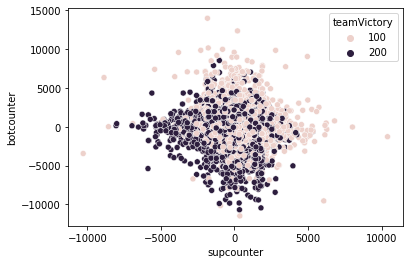

In [79]:
sns.scatterplot(tmp.join(Y_train),x='supcounter',y='botcounter',hue='teamVictory')

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(tmp, Y, test_size = 0.2, random_state = 0)

In [80]:
#Grid Search
param_grid = [
        {
            'max_depth' : range(1,20),
            'min_samples_leaf' : range(1,20),
            
        }
       ]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(train_X,train_Y)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'max_depth': 11, 'min_samples_leaf': 19}


              precision    recall  f1-score   support

         100       0.57      0.54      0.56      6084
         200       0.57      0.59      0.58      6170

    accuracy                           0.57     12254
   macro avg       0.57      0.57      0.57     12254
weighted avg       0.57      0.57      0.57     12254



<Figure size 432x288 with 0 Axes>

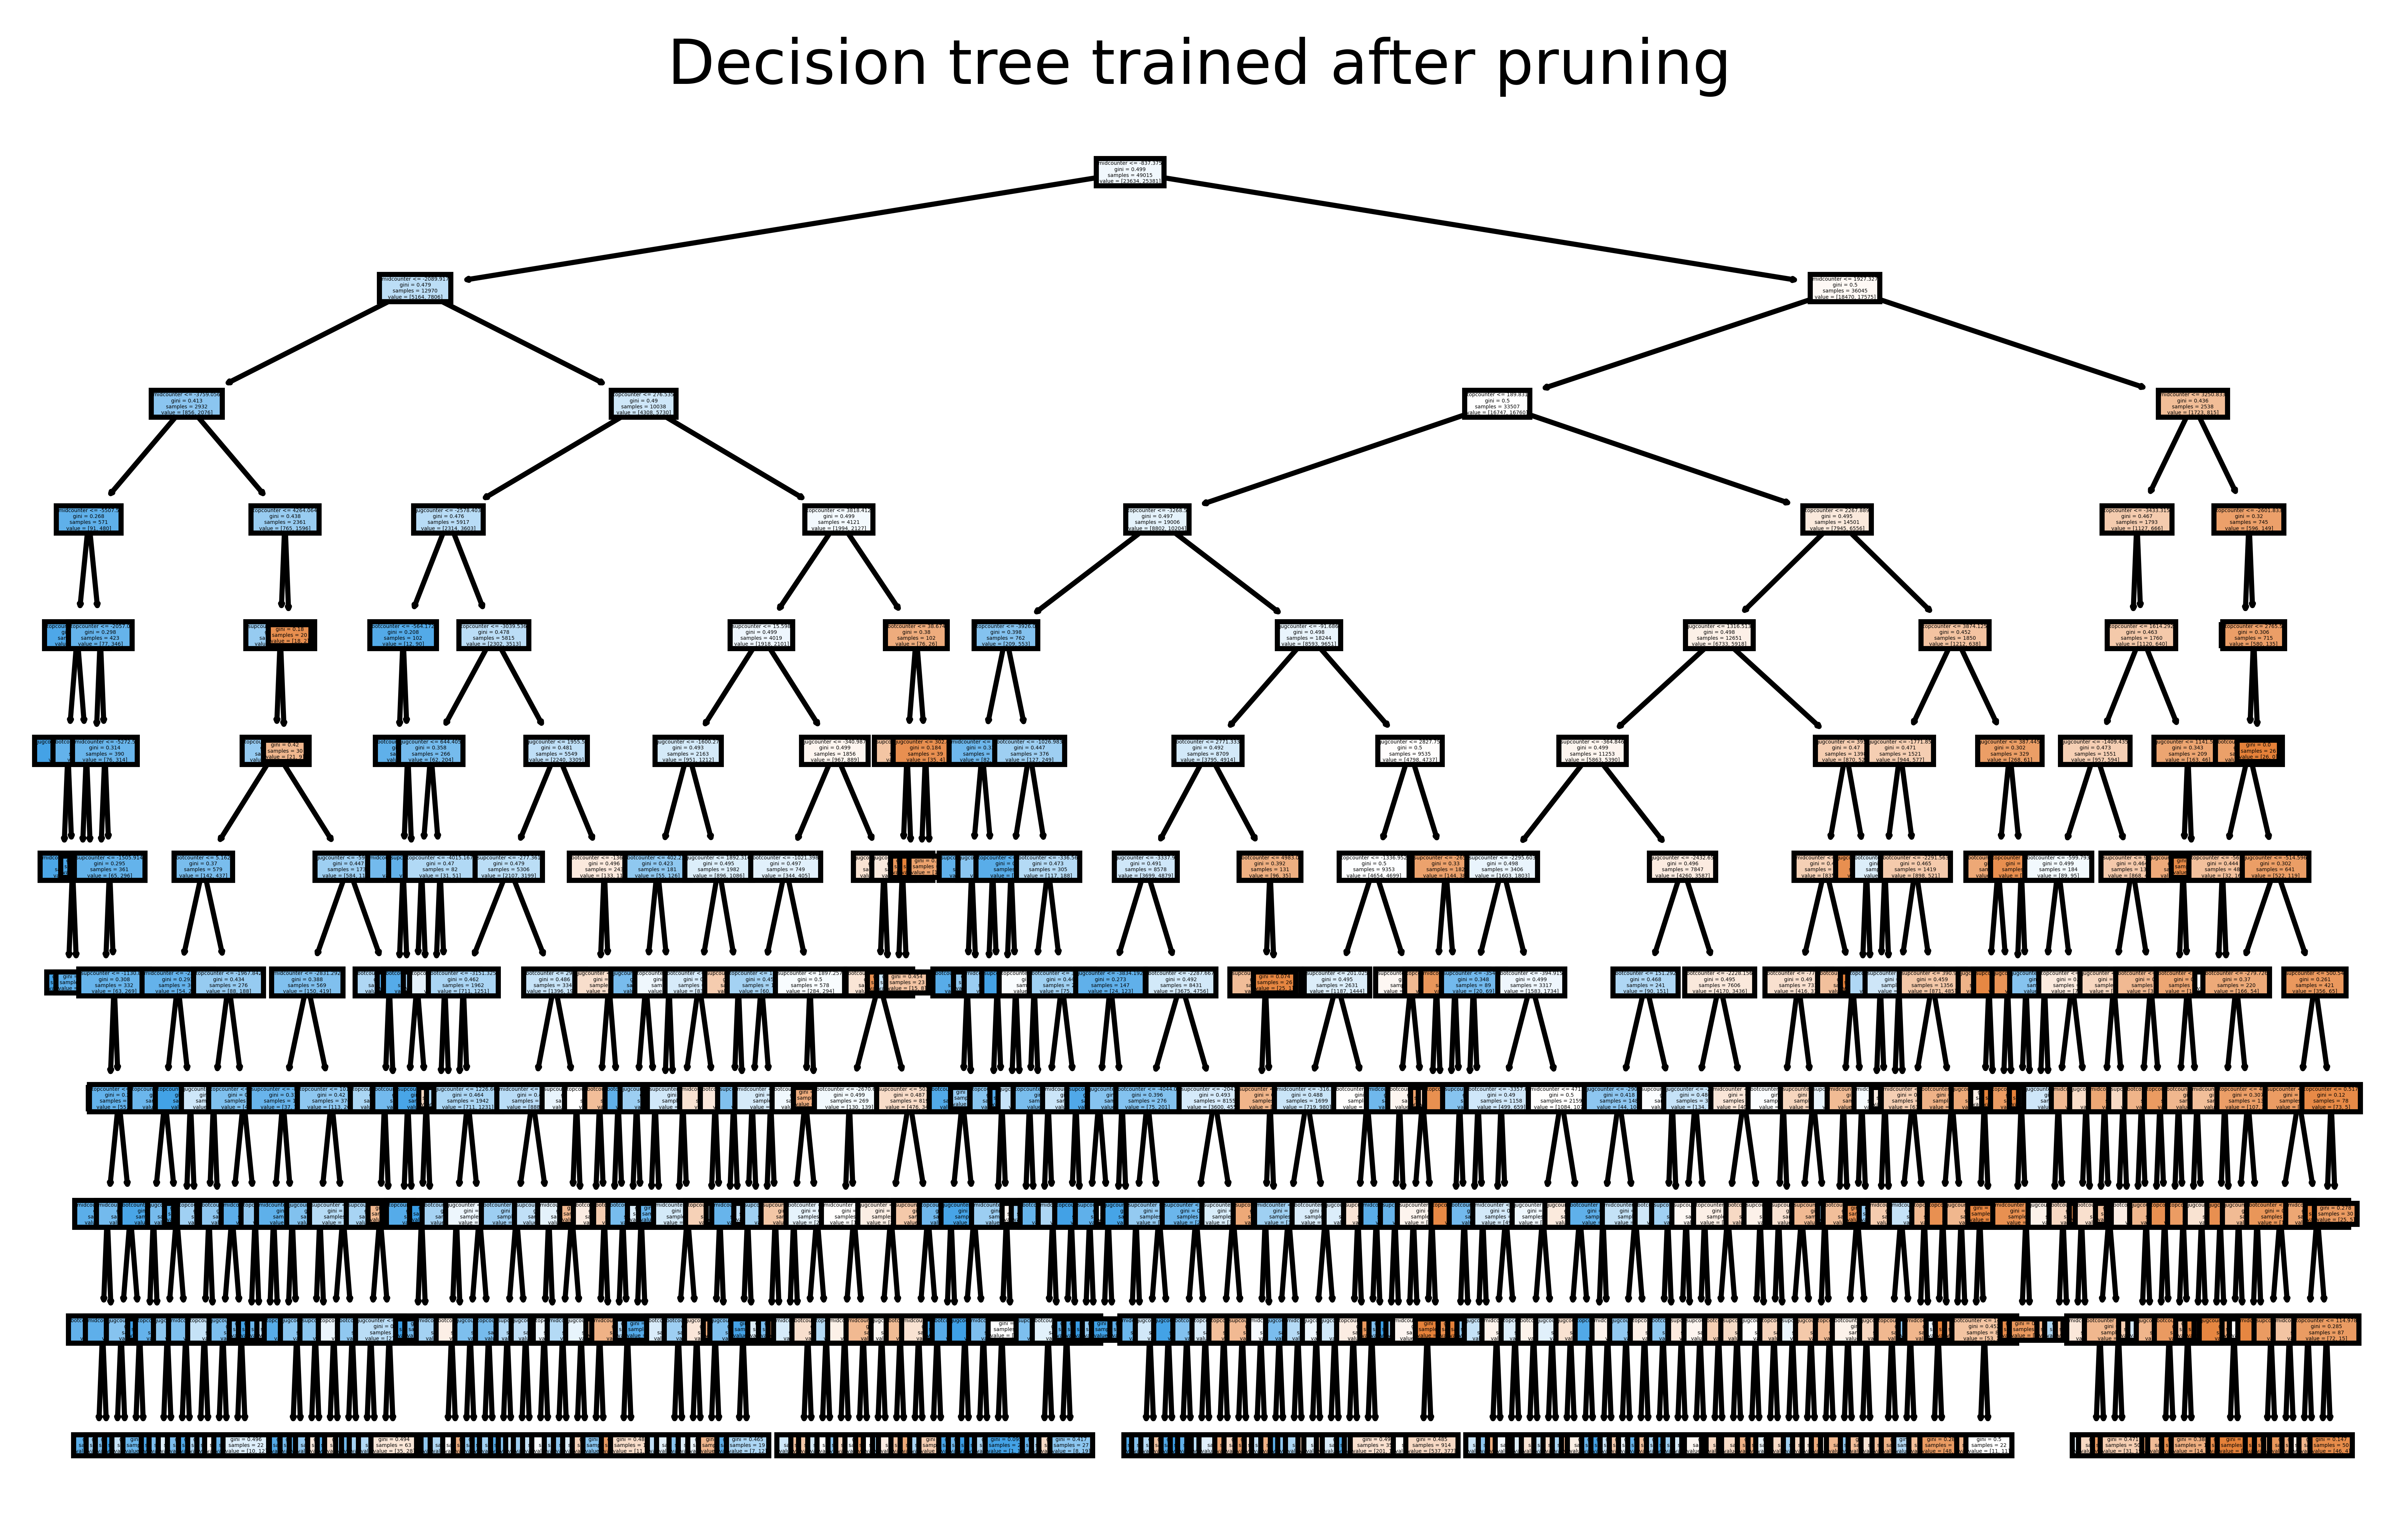

In [81]:
DCT = DecisionTreeClassifier(max_depth=11,min_samples_leaf = 19)
DCT.fit(train_X,train_Y)
y_predict = DCT.predict(test_X)

print(classification_report(y_true=test_Y,y_pred=y_predict))

#plot the decision tree with unlimited max depth
plt.figure()
plt.figure(dpi=1000,figsize=(8,5))
plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
plt.title("Decision tree trained after pruning")
plt.show()


In [87]:
tmp.head()

,topcounter,jugcounter,midcounter,botcounter,supcounter
0,-1076.375000,-2355.764706,542.504983,-1252.540670,1831.039568
1,510.135593,238.769231,1914.142857,384.041096,222.537367
2,1708.600000,1173.750000,-828.910891,911.861538,-1442.581250
3,1865.181818,-587.740741,-362.743590,-1019.317610,249.875000
4,-2156.500000,613.000000,972.842105,-628.267677,-19.439306


In [93]:
df[['Player_1_pick','Player_1_gold','Player_6_pick','Player_6_gold']].loc[(df[['Player_1_pick','Player_1_gold','Player_6_pick','Player_6_gold']]['Player_1_pick']==516)&(df[['Player_1_pick','Player_1_gold','Player_6_pick','Player_6_gold']]['Player_6_pick']==36)]

,Player_1_pick,Player_1_gold,Player_6_pick,Player_6_gold
0,516,11898,36,11129
1721,516,12371,36,15126
4947,516,12150,36,12527
12255,516,9947,36,13442
12511,516,9138,36,12752
31862,516,19309,36,16357
34880,516,7475,36,15856
35830,516,12230,36,13640
36411,516,14261,36,11366
43930,516,11420,36,8028


In [85]:
df[['Player_1_pick','Player_1_gold','Player_6_pick','Player_6_gold']]

,Player_1_pick,Player_1_gold,Player_6_pick,Player_6_gold
0,516,11898,36,11129
1,150,11144,114,9478
2,50,11770,166,8957
3,420,16797,92,8824
4,98,7108,114,12861
...,...,...,...,...
86630,39,17853,107,18193
86632,122,8212,164,7158
86633,102,14323,39,10554
86634,41,7919,26,6455
